In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

train ='/Users/steve/Desktop/242A/Final Project/Final Project Data/Cleaned Data/cleaned_collision_train_data.csv'
test = '/Users/steve/Desktop/242A/Final Project/Final Project Data/Cleaned Data/cleaned_collision_test_data.csv'


train_data = pd.read_csv(train)
test_data = pd.read_csv(test)

target = 'ACRS Report Type'
X_train = train_data.drop(columns=[target])
y_train = train_data[target]

label_encoders = {}
for column in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                   Feature  Importance
10               Longitude    0.115111
9                 Latitude    0.112542
2        Cross-Street Name    0.088720
22           Date in Month    0.084293
19                    Time    0.067995
1                Road Name    0.067798
20                   Month    0.059417
12          Collision Type    0.051472
21                    Year    0.049251
8             Vehicle Year    0.045165
17             Day of Week    0.044024
15            Vehicle Make    0.041570
14       Vehicle Body Type    0.031429
7              Speed Limit    0.028590
16        Vehicle Movement    0.021119
11         Traffic Control    0.017791
3                  Weather    0.016446
5                    Light    0.013865
0               Route Type    0.012345
6   Driver Substance Abuse    0.012217
4        Surface Condition    0.007773
13         Driver At Fault    0.006127
18                 Weekend    0.004938


                   Feature  Importance
10               Longitude    0.115111
9                 Latitude    0.112542
2        Cross-Street Name    0.088720
22           Date in Month    0.084293
19                    Time    0.067995
1                Road Name    0.067798
20                   Month    0.059417
12          Collision Type    0.051472
21                    Year    0.049251
8             Vehicle Year    0.045165
17             Day of Week    0.044024
15            Vehicle Make    0.041570
14       Vehicle Body Type    0.031429
7              Speed Limit    0.028590
16        Vehicle Movement    0.021119
11         Traffic Control    0.017791
3                  Weather    0.016446
5                    Light    0.013865
0               Route Type    0.012345
6   Driver Substance Abuse    0.012217
4        Surface Condition    0.007773
13         Driver At Fault    0.006127
18                 Weekend    0.004938


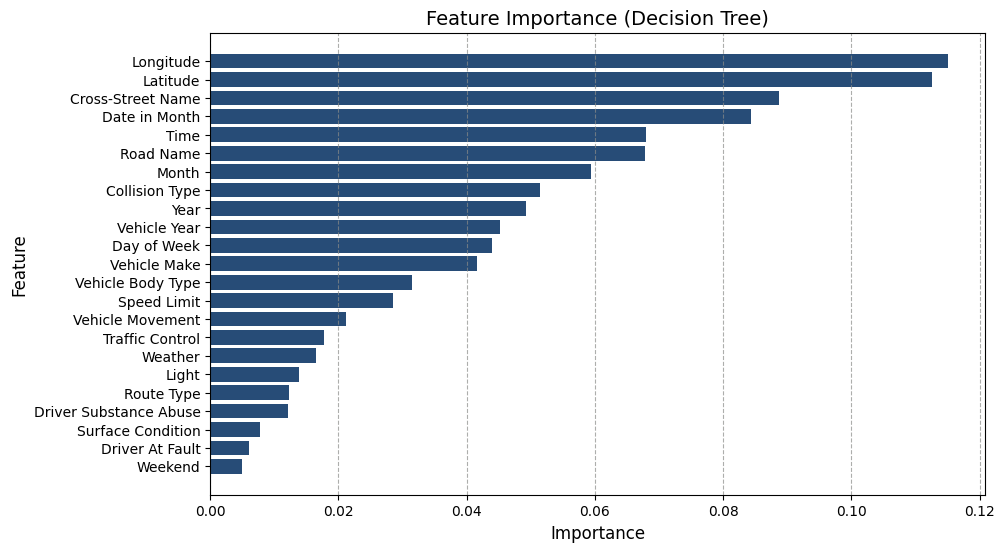

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt


target = 'ACRS Report Type'
X_train = train_data.drop(columns=[target])
y_train = train_data[target]

# Encode categorical variables
label_encoders = {}
for column in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

# Encode target variable
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)

# Train Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Get Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='#274C77')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance (Decision Tree)', fontsize=14)

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7, color='#8B8C89')
plt.show()


In [ ]:
threshold = 0.05

selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].tolist()

print("Selected Features:", selected_features)

X_train_selected = X_train[selected_features]


Selected Features: ['Longitude', 'Latitude', 'Cross-Street Name', 'Date in Month', 'Time', 'Road Name', 'Month', 'Collision Type']


**Logistic Regression**


Model Evaluation Metrics:
Accuracy: 0.4179
Precision: 0.5897
Recall: 0.4179
F1-Score: 0.4846
ROC-AUC Score: 0.6283


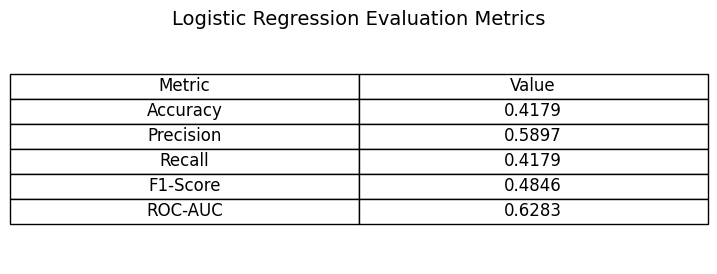

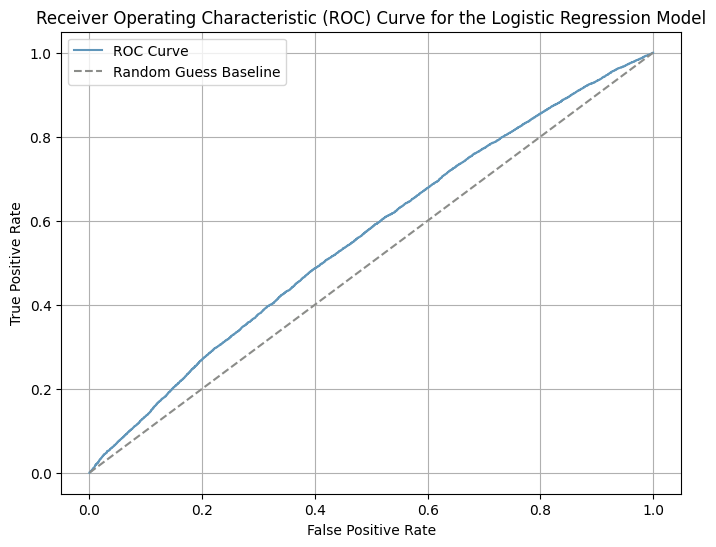

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

train_data_path_1 ='/Users/steve/Desktop/242A/Final Project/Final Project Data/Cleaned Data/cleaned_collision_train_data.csv'
test_data_path_1 = '/Users/steve/Desktop/242A/Final Project/Final Project Data/Cleaned Data/cleaned_collision_test_data.csv'

train_data = pd.read_csv(train_data_path_1)
test_data = pd.read_csv(test_data_path_1)

# Separate features and target
X_train = train_data.drop(columns=['ACRS Report Type'])
y_train = train_data['ACRS Report Type']
X_test = test_data.drop(columns=['ACRS Report Type'])
y_test = test_data['ACRS Report Type']

# Encode categorical variables
label_encoders = {}
for column in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = X_test[column].apply(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )
    label_encoders[column] = le

# Encode target variable
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE with specific parameters
smote = SMOTE(random_state=1, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression Model with OneVsRestClassifier
log_model = OneVsRestClassifier(LogisticRegression(max_iter=2000, random_state=42, solver='lbfgs'))
log_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)

# Model Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

# Print Metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Create a table summarizing evaluation metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Value": [round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4), round(roc_auc, 4)]
}

metrics_df = pd.DataFrame(metrics_data)

# Plot the metrics as a table
plt.figure(figsize=(6, 3))
plt.axis('tight')
plt.axis('off')
table = plt.table(
    cellText=metrics_df.values,
    colLabels=metrics_df.columns,
    loc='center',
    cellLoc='center'
)

# Adjust table font size and cell spacing
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Logistic Regression Evaluation Metrics", fontsize=14)
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#6096BA', label="ROC Curve")
plt.plot([0, 1], [0, 1], color='#8B8C89', linestyle='--', label="Random Guess Baseline")
plt.title('Receiver Operating Characteristic (ROC) Curve for the Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


**Decision Tree**


Model Evaluation Metrics:
Accuracy: 0.6004
Precision: 0.6082
Recall: 0.6004
F1-Score: 0.6035
ROC-AUC Score: 0.5891


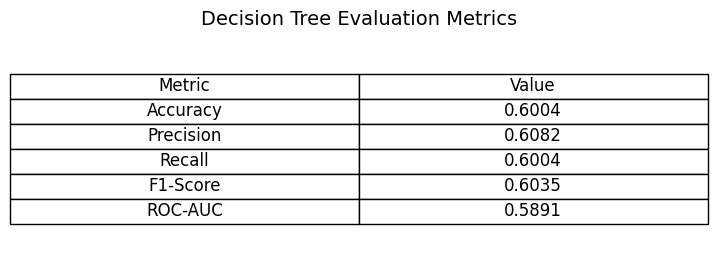

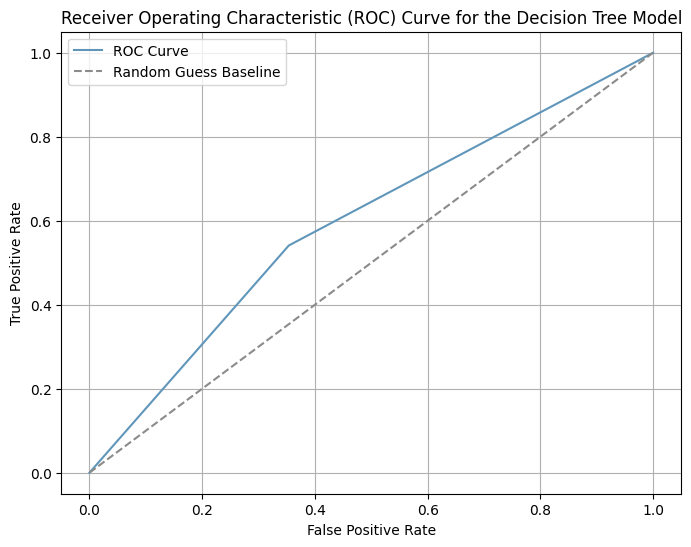

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

train_data_path_2 ='/Users/steve/Desktop/242A/Final Project/Final Project Data/Cleaned Data/cleaned_collision_train_data.csv'
test_data_path_2 = '/Users/steve/Desktop/242A/Final Project/Final Project Data/Cleaned Data/cleaned_collision_test_data.csv'

train_data = pd.read_csv(train_data_path_2)
test_data = pd.read_csv(test_data_path_2)

# Separate features and target
X_train = train_data.drop(columns=['ACRS Report Type'])
y_train = train_data['ACRS Report Type']
X_test = test_data.drop(columns=['ACRS Report Type'])
y_test = test_data['ACRS Report Type']

# Encode categorical variables
label_encoders = {}
for column in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = X_test[column].apply(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )
    label_encoders[column] = le

# Encode target variable
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

# Handle class imbalance using SMOTE with specified parameters
smote = SMOTE(random_state=1, k_neighbors=5)  # Updated SMOTE parameters
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)

# Model Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

# Print Metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Create a table summarizing evaluation metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Value": [round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4), round(roc_auc, 4)]
}

metrics_df = pd.DataFrame(metrics_data)

# Plot the metrics as a table
plt.figure(figsize=(6, 3))
plt.axis('tight')
plt.axis('off')
table = plt.table(
    cellText=metrics_df.values,
    colLabels=metrics_df.columns,
    loc='center',
    cellLoc='center'
)


table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Decision Tree Evaluation Metrics", fontsize=14)
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#6096BA', label="ROC Curve")
plt.plot([0, 1], [0, 1], color='#8B8C89', linestyle='--', label="Random Guess Baseline")
plt.title('Receiver Operating Characteristic (ROC) Curve for the Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()
